In [1]:
#Import the functions needed. 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Define the data
#Input data (x,y,bias)
X=np.array([[-2,4],[4,1],[1, 6],[2, 4],[6, 2]])

In [3]:
#The output array or labels. 
y=np.array([-1,-1,1,1,1])

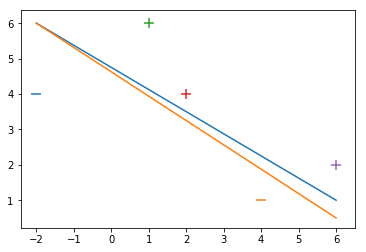

In [4]:
for d, sample in enumerate(X):
    # Plot the negative samples (the first 2)
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_')
    # Plot the positive samples (the last 3)
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+')
plt.plot([-2,6],[6,1])
plt.plot([-2,6],[6,0.5])

In [5]:
#Gradient descent to learn the separating hyperplane between both the classes. 
def svm_gd(X,Y):
    w=np.zeros(len(X[0]))
    l=1
    epoch=20
    errors=[]
    
    for e in range(1,epoch):
        error=0
        for i,v in enumerate(X):
            print("wt:",w)
            print('Xterms',X[i])
            print(Y[i]*np.dot(X[i],w))
            if (Y[i]*np.dot(X[i],w))<1:
                w= w+l*((X[i]*Y[i])+(-2*(1/epoch)*w))
                
                error=1
            else:
                w=w+l*(-2*(1/epoch)*w)
        errors.append(error)
    #print(errors)    
    plt.plot(errors,'|')
    plt.ylim(0.5,1.5)
    plt.show()
    return w, sum(errors)
    

('wt:', array([ 0.,  0.]))
('Xterms', array([-2,  4]))
-0.0
('wt:', array([ 2., -4.]))
('Xterms', array([4, 1]))
-4.0
('wt:', array([-2., -5.]))
('Xterms', array([1, 6]))
-32.0
('wt:', array([-1.,  1.]))
('Xterms', array([2, 4]))
2.0
('wt:', array([-1.,  1.]))
('Xterms', array([6, 2]))
-4.0
('wt:', array([ 5.,  3.]))
('Xterms', array([-2,  4]))
-2.0
('wt:', array([ 7., -1.]))
('Xterms', array([4, 1]))
-27.0
('wt:', array([ 3., -2.]))
('Xterms', array([1, 6]))
-9.0
('wt:', array([ 4.,  4.]))
('Xterms', array([2, 4]))
24.0
('wt:', array([ 4.,  4.]))
('Xterms', array([6, 2]))
32.0
('wt:', array([ 4.,  4.]))
('Xterms', array([-2,  4]))
-8.0
('wt:', array([ 6.,  0.]))
('Xterms', array([4, 1]))
-24.0
('wt:', array([ 2., -1.]))
('Xterms', array([1, 6]))
-4.0
('wt:', array([ 3.,  5.]))
('Xterms', array([2, 4]))
26.0
('wt:', array([ 3.,  5.]))
('Xterms', array([6, 2]))
28.0
('wt:', array([ 3.,  5.]))
('Xterms', array([-2,  4]))
-14.0
('wt:', array([ 5.,  1.]))
('Xterms', array([4, 1]))
-21.0
('

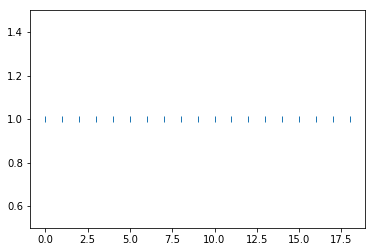

(array([ 0.,  5.]), 19)

In [6]:
svm_gd(X,y)

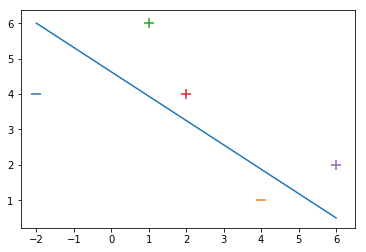

In [7]:
import numpy as np
#to plot our data and model visually
from matplotlib import pyplot as plt
%matplotlib inline

#Step 1 - Define our data

#Input data - Of the form [X value, Y value, Bias term]
X = np.array([
    [-2,4,-1],
    [4,1,-1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

#Associated output labels - First 2 examples are labeled '-1' and last 3 are labeled '+1'
y = np.array([-1,-1,1,1,1])

#lets plot these examples on a 2D graph!
#for each example
for d, sample in enumerate(X):
    # Plot the negative samples (the first 2)
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples (the last 3)
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
#we'll two points and draw the line between them (naive guess)
plt.plot([-2,6],[6,0.5])

In [8]:
#lets perform stochastic gradient descent to learn the seperating hyperplane between both classes

def svm_sgd_plot(X, Y):
    #Initialize our SVMs weight vector with zeros (3 values)
    w = np.zeros(len(X[0]))
    #The learning rate
    eta = 1
    #how many iterations to train for
    epochs = 100000
    #store misclassifications so we can plot how they change over time
    errors = []

    #training part, gradient descent part
    for epoch in range(1,epochs):
        error = 0
        for i, x in enumerate(X):
            #misclassification
            if (Y[i]*np.dot(X[i], w)) < 1:
                #misclassified update for ours weights
                w = w + eta * ( (X[i] * Y[i]) + (-2  *(1/epoch)* w) )
                error = 1
            else:
                #correct classification, update our weights
                w = w + eta * (-2  *(1/epoch)* w)
        errors.append(error)
        

    #lets plot the rate of classification errors during training for our SVM
    plt.plot(errors, '|')
    plt.ylim(0.5,1.5)
    plt.axes().set_yticklabels([])
    plt.xlabel('Epoch')
    plt.ylabel('Misclassified')
    plt.show()
    
    return w

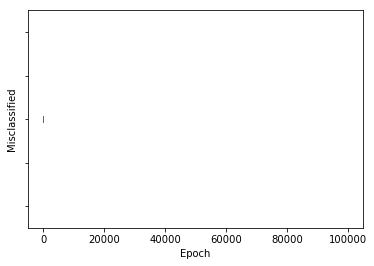

In [9]:
w = svm_sgd_plot(X,y)

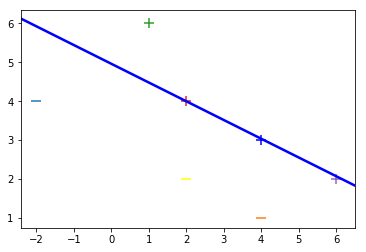

In [10]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples
plt.scatter(2,2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4,3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by svm_sgd()
x2=[w[0],w[1],-w[1],w[0]]
x3=[w[0],w[1],w[1],-w[0]]

x2x3 =np.array([x2,x3])
X,Y,U,V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X,Y,U,V,scale=1, color='blue')

In [53]:
w=np.zeros(len(X[0]))

In [54]:
w

array([ 0.,  0.,  0.])

In [ ]:
# Works differently in two different computers